In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV 

In [20]:
train=pd.read_csv("Downloads/car_price/train-data.csv")

In [21]:
df=train.copy()

In [4]:
df.drop(["Unnamed: 0","New_Price"],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [6]:
df=df[df["Mileage"].isna()==False]

In [7]:
df.shape

(6017, 12)

In [8]:
Correct_Mileage= []
for i in df.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        #print(i)
        Correct_Mileage.append(float(i))

In [9]:
df['Mileage']=Correct_Mileage

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6017 non-null   object 
 1   Location           6017 non-null   object 
 2   Year               6017 non-null   int64  
 3   Kilometers_Driven  6017 non-null   int64  
 4   Fuel_Type          6017 non-null   object 
 5   Transmission       6017 non-null   object 
 6   Owner_Type         6017 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5981 non-null   object 
 9   Power              5981 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              6017 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 611.1+ KB


In [52]:
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,2,0,3,37.24,998.0,58.16,5.0,1.75
1,2015,41000,0,0,3,19.60,1582.0,126.20,5.0,12.50
2,2011,46000,1,0,3,18.00,1199.0,88.70,5.0,4.50
3,2012,87000,0,0,3,20.70,1248.0,88.76,7.0,6.00
4,2013,40670,0,1,2,15.00,1968.0,140.80,5.0,17.74


In [54]:
print(df.Power.describe())
print(df.Engine.describe())

count    6017.000000
mean      113.272203
std        53.229183
min        34.200000
25%        78.000000
50%        98.600000
75%       138.030000
max       560.000000
Name: Power, dtype: float64
count    6017.000000
mean     1621.505935
std       599.316375
min       624.000000
25%      1198.000000
50%      1493.000000
75%      1969.000000
max      5998.000000
Name: Engine, dtype: float64


In [12]:
df.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [23]:
def preprocessing (data):
    df=data.copy()
    # droping useless columns
    df=df.drop(["Unnamed: 0","New_Price"],axis=1)
    #droping missing value in mileage column
    df=df[df["Mileage"].isna()==False]
    #correcting unit problem in mileage
    Correct_Mileage= []
    for i in df.Mileage:
        if str(i).endswith('km/kg'):
            i = i[:-6]
            i = float(i)*1.40
            Correct_Mileage.append(float(i))
        elif str(i).endswith('kmpl'):
            i = i[:-6]
            #print(i)
            Correct_Mileage.append(float(i))
    df['Mileage']=Correct_Mileage
    
    # cleaning columns
    df['Engine'] = df['Engine'].str.split(expand=True)[0].astype(float)
    df['Power'] = df['Power'].replace('null bhp',None)

    df['Power'] = df['Power'].str.split(expand=True)[0].astype(float)
    
    #missing value
    df=replace(df)
    
    df.drop(["Name","Location"],axis=1,inplace=True)
    #encoding
    df=binary_encoding(df,[("Transmission","Automatic")])
    df=ordinal_encoding(df,[("Owner_Type",["Fourth & Above","Third","Second","First"]),("Fuel_Type",["Diesel","Petrol","CNG","LPG","Electric"])])
    
    
    #standardize data
    #df=pd.DataFrame(StandardScaler().fit_transform(df),columns=["Year","Kilometers_Driven","Fuel_Type","Transmission","Owner_Type","Mileage","Engine","Power","Seats"])
    
    
    return df

In [26]:
df=preprocessing(df)

In [14]:
df['Company'] = df['Name'].str.split(expand=True)[0].str.lower()
df['Model'] = df['Name'].str.split().str[0:2].str.join(' ').str.lower()
df.drop(columns = ['Name'],inplace = True)

In [15]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model
0,Mumbai,2010,72000,CNG,Manual,First,37.24,998 CC,58.16 bhp,5.0,1.75,maruti,maruti wagon
1,Pune,2015,41000,Diesel,Manual,First,19.60,1582 CC,126.2 bhp,5.0,12.50,hyundai,hyundai creta
2,Chennai,2011,46000,Petrol,Manual,First,18.00,1199 CC,88.7 bhp,5.0,4.50,honda,honda jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.70,1248 CC,88.76 bhp,7.0,6.00,maruti,maruti ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968 CC,140.8 bhp,5.0,17.74,audi,audi a4


In [16]:
df['Power'] = df['Power'].replace('null bhp',None)

df['Power'] = df['Power'].str.split(expand=True)[0].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6017 non-null   object 
 1   Year               6017 non-null   int64  
 2   Kilometers_Driven  6017 non-null   int64  
 3   Fuel_Type          6017 non-null   object 
 4   Transmission       6017 non-null   object 
 5   Owner_Type         6017 non-null   object 
 6   Mileage            6017 non-null   float64
 7   Engine             5981 non-null   object 
 8   Power              5874 non-null   float64
 9   Seats              5975 non-null   float64
 10  Price              6017 non-null   float64
 11  Company            6017 non-null   object 
 12  Model              6017 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 658.1+ KB


In [18]:
def replace(data,cols=["Power","Engine","Seats"]):
    df=data.copy()
    for col in cols:
            df[col].replace(np.nan,df[col].mean(),inplace=True)
    return df

In [19]:
df=replace(df)

TypeError: can only concatenate str (not "int") to str

In [ ]:
df.info()

In [ ]:
df.Location.unique()

In [ ]:
len(df.Company.unique())

In [ ]:
df.drop(["Model","Company","Location"],axis=1,inplace=True)

In [ ]:
df.info()

In [25]:

def binary_encoding(df,cols_pos):
    df=df.copy()
    for col,pos in cols_pos:
        df[col]=df[col].apply(lambda x:1 if x== pos else 0)
    return df
def ordinal_encoding(df,cols_pos):
    df=df.copy()
    for col,order in cols_pos:
        df[col]=df[col].apply(lambda x:order.index(x))
    return df
def onehotencoding(df,cols):
    df=df.copy()
    for col in cols:
        dummies=pd.get_dummies(df[col])
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(col,axis=1)
    return df

In [ ]:
for col in df.columns:
    print(df[col],":",len(df[col].unique()))

In [ ]:
df=binary_encoding(df,[("Transmission","Automatic")])


In [ ]:
df=ordinal_encoding(df,[("Owner_Type",["Fourth & Above","Third","Second","First"]),("Fuel_Type",["Diesel","Petrol","CNG","LPG","Electric"])])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6017 non-null   int64  
 1   Kilometers_Driven  6017 non-null   int64  
 2   Fuel_Type          6017 non-null   int64  
 3   Transmission       6017 non-null   int64  
 4   Owner_Type         6017 non-null   int64  
 5   Mileage            6017 non-null   float64
 6   Engine             6017 non-null   float64
 7   Power              6017 non-null   float64
 8   Seats              6017 non-null   float64
 9   Price              6017 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 517.1 KB


In [29]:
x=df.drop("Price",axis=1)
y=df.Price
#x1=pd.DataFrame(StandardScaler().fit_transform(x),columns=["Year","Kilometers_Driven","Fuel_Type","Transmission","Owner_Type","Mileage","Engine","Power","Seats"])

In [30]:
x.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,2010,72000,2,0,3,37.24,998.0,58.16,5.0
1,2015,41000,0,0,3,19.60,1582.0,126.20,5.0
2,2011,46000,1,0,3,18.00,1199.0,88.70,5.0
3,2012,87000,0,0,3,20.70,1248.0,88.76,7.0
4,2013,40670,0,1,2,15.00,1968.0,140.80,5.0


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
Xtr,Xte,Ytr,Yte=train_test_split(x,y,test_size=0.2,random_state=1)

In [36]:
fold=KFold(n_splits=5)

In [ ]:
#linear reg

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [ ]:
model=LinearRegression()
para={}
grid_li=GridSearchCV(model,param_grid=para,cv=fold,verbose=1)

In [ ]:
grid_li.fit(Xtr,Ytr)

In [ ]:
grid_li.score(Xte,Yte)

In [ ]:
#log
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model=RandomForestRegressor()
para={"n_estimators":[200,300,500],
     "max_depth":[5,10,15,20,30]}
grid_rf=GridSearchCV(model,param_grid=para,cv=fold,verbose=1)
grid_rf.fit(Xtr,Ytr)

In [ ]:
print(grid_rf.score(Xte,Yte))
print(grid_rf.best_estimator_)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
para={ "max_depth":[5,10,15,20]}
grid_tr=GridSearchCV(model,param_grid=para,cv=fold,verbose=1)
grid_tr.fit(Xtr,Ytr)
tree.fit(Xtr,Ytr)

In [ ]:
grid_tr.score(Xte,Yte)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler , OneHotEncoder,PolynomialFeatures ,PowerTransformer
from sklearn.compose import make_column_transformer
from category_encoders import BinaryEncoder

In [ ]:
features = df.columns.drop(['Price'])
target = ['Price']

X = df[features]
y = df[target]

num_features = X.select_dtypes('number').columns
cat_features = X.select_dtypes('object').columns
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#numerical pipeline
num_pipeline = make_pipeline(
                SimpleImputer(),
                StandardScaler(),
                PolynomialFeatures(degree=3)
)
#categorical pipeline
cat_pipeline = make_pipeline(
                SimpleImputer(strategy='most_frequent'),
                OneHotEncoder()
                
)
#full pipeline
preprocessor = make_column_transformer(
                (num_pipeline,num_features),
                (cat_pipeline,cat_features)
)

In [ ]:
lin_reg = make_pipeline(
            preprocessor,
            RandomForestRegressor()
    )
lin_reg.fit(X_train,y_train);

In [ ]:
lin_reg.score(X_test,y_test)

In [ ]:
import pickle

In [ ]:
with open("rf","wb") as files:
    pickle.dump(lin_reg,files)

In [51]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6017 non-null   int64  
 1   Kilometers_Driven  6017 non-null   int64  
 2   Fuel_Type          6017 non-null   int64  
 3   Transmission       6017 non-null   int64  
 4   Owner_Type         6017 non-null   int64  
 5   Mileage            6017 non-null   float64
 6   Engine             6017 non-null   float64
 7   Power              6017 non-null   float64
 8   Seats              6017 non-null   float64
 9   Price              6017 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 517.1 KB


Index(['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Price'],
      dtype='object')

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn .ensemble import GradientBoostingRegressor

In [37]:
model=RandomForestRegressor()
para={"n_estimators":[200,300,500],
     "max_depth":[5,10,15,20,30]}
grid_rf=GridSearchCV(model,param_grid=para,cv=fold,verbose=1)
grid_rf.fit(Xtr,Ytr)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, 30],
                         'n_estimators': [200, 300, 500]},
             verbose=1)

In [38]:
print(grid_rf.best_estimator_)
print(grid_rf.score(Xte,Yte))

RandomForestRegressor(max_depth=15, n_estimators=500)
0.9020465394694641


In [39]:
model =GradientBoostingRegressor()
para={"n_estimators":[50,100,200],
     "max_depth":[2,3,4],
     "learning_rate":[0.01,0.05,0.1,0.5]}
grid_gbt=GridSearchCV(model,param_grid=para,cv=fold,verbose=1)
grid_gbt.fit(Xtr,Ytr)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [43]:
gbt=grid_gbt.best_estimator_
print(grid_gbt.score(Xte,Yte))

0.9051425003015637


In [61]:

gbt_line=make_pipeline(gbt)
gbt_line.fit(Xtr,Ytr)
gbt_line.score(Xte,Yte)

0.9064882819210107

In [56]:
import pickle
with open("new_m","wb") as files:
    pickle.dump(gbt_line,files)

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [74]:
train["company"]=train.Name.str.split(expand=True)[0]

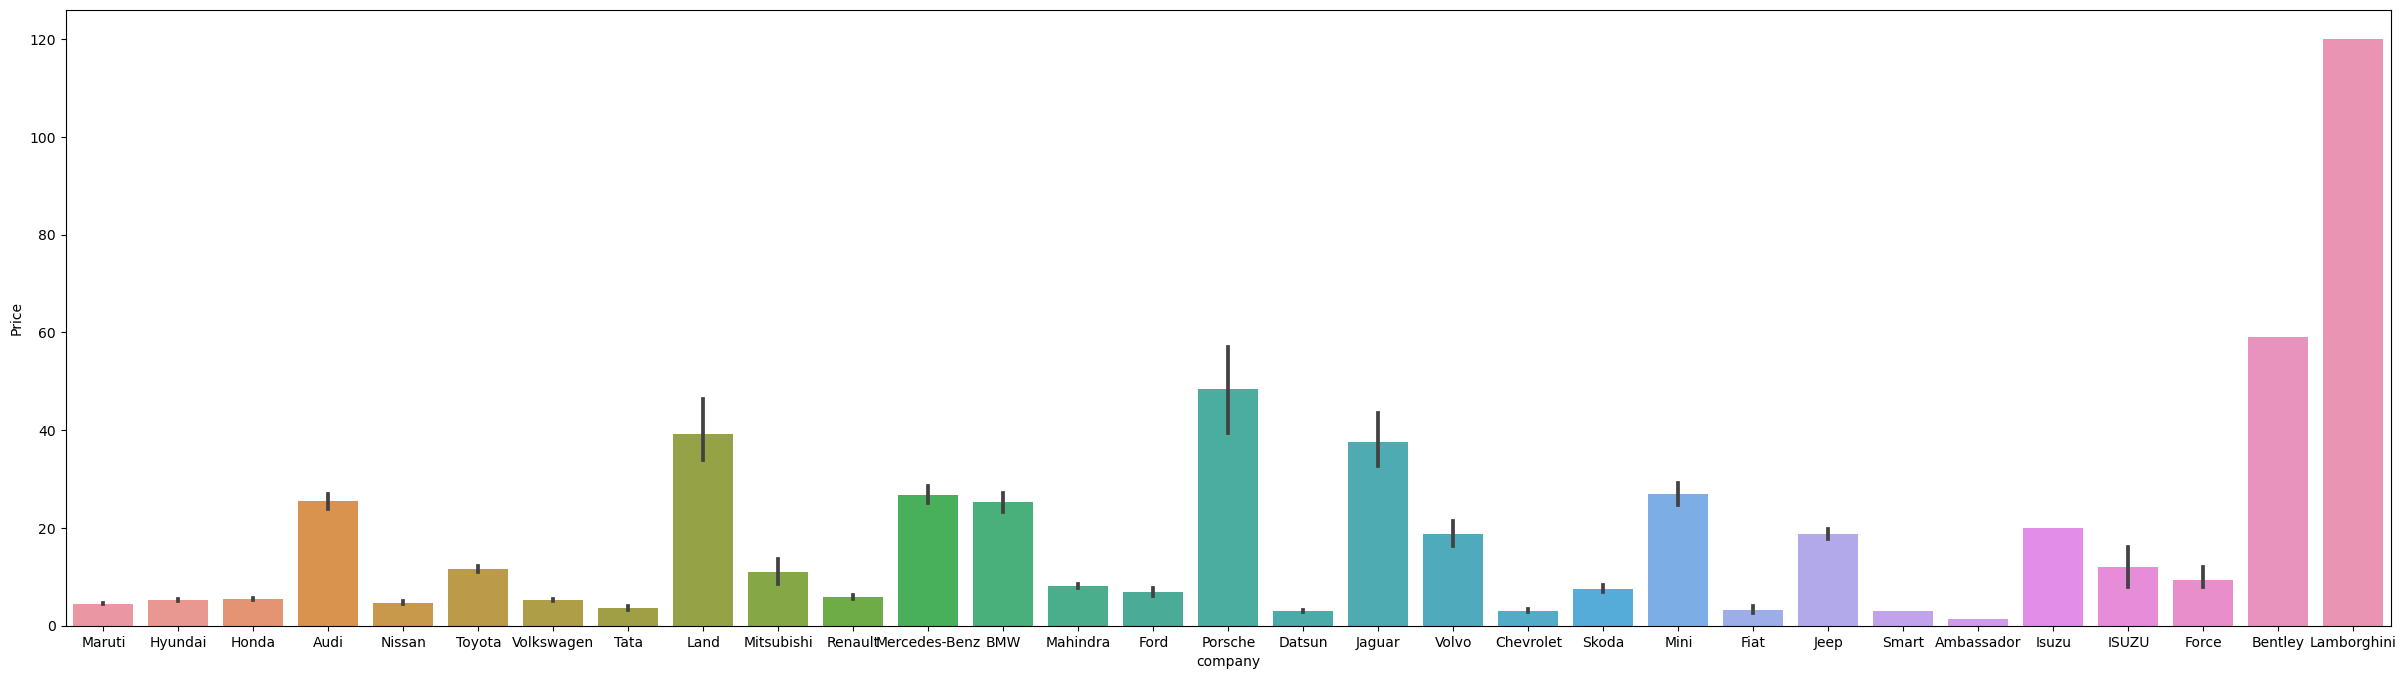

In [80]:
plt.figure(figsize = (30,8))
sns.barplot(x=train.company,y=train.Price)
plt.show()

In [81]:
train.company.value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: company, dtype: int64

In [ ]:
luxury=["Bentley","Lamborghini","Porsche","Jaguar"]
cheap=["Force","Maruti","Mahindra","Tata","Honda","Toyota","Volkswagen","Skoda","Renault","Fiat","Datsun","Ford",]
mid=["BMW","Audi","Mercedes-Benz","Jeep","ISUZU","volvo",]